Data preproccessing

In [ ]:
import numpy as np  
import pandas as pd  
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
import os
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/all_month (1).csv')#https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-27T03:52:15.750Z,36.974998,-121.046166,7.590000,1.96,md,27.0,105.0,0.0545,0.16,...,2022-12-27T04:26:11.533Z,"20km WSW of Los Banos, CA",earthquake,0.52,1.000,0.170,25.0,automatic,nc,nc
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,mb,21.0,133.0,4.1790,0.70,...,2022-12-27T04:05:32.040Z,south of Tonga,earthquake,6.69,1.925,0.141,16.0,reviewed,us,us
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,ml,NaN,NaN,NaN,0.53,...,2022-12-27T03:43:30.916Z,"6 km SE of Kasilof, Alaska",earthquake,NaN,2.000,NaN,NaN,automatic,ak,ak
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,ml,NaN,NaN,NaN,0.37,...,2022-12-27T03:39:23.482Z,"63 km WNW of Happy Valley, Alaska",earthquake,NaN,0.700,NaN,NaN,automatic,ak,ak
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,mb,49.0,48.0,10.6010,0.64,...,2022-12-27T03:57:38.040Z,"110 km SW of Jinchang, China",earthquake,10.15,1.939,0.079,48.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,ml,NaN,NaN,NaN,0.74,...,2022-12-15T01:43:46.177Z,"91 km SSE of Kokhanok, Alaska",earthquake,NaN,0.200,NaN,NaN,reviewed,ak,ak
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,mb,46.0,69.0,1.9820,0.92,...,2022-12-24T00:51:13.040Z,Kermadec Islands region,earthquake,9.44,1.818,0.084,47.0,reviewed,us,us
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,mb,91.0,37.0,2.4110,0.76,...,2022-12-24T00:19:26.107Z,"22 km ENE of Cortes, Philippines",earthquake,8.28,6.102,0.044,165.0,reviewed,us,us
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,ml,NaN,NaN,NaN,0.36,...,2022-12-12T22:21:18.648Z,"18 km NW of Fishhook, Alaska",earthquake,NaN,0.700,NaN,NaN,reviewed,ak,ak


                 latitude  longitude     depth       mag       nst       gap  \
latitude         1.000000  -0.422101 -0.150990 -0.555856 -0.296565  0.124534   
longitude       -0.422101   1.000000  0.138683  0.534637  0.320992 -0.084628   
depth           -0.150990   0.138683  1.000000  0.361909  0.244570 -0.038020   
mag             -0.555856   0.534637  0.361909  1.000000  0.524944 -0.091382   
nst             -0.296565   0.320992  0.244570  0.524944  1.000000 -0.393750   
gap              0.124534  -0.084628 -0.038020 -0.091382 -0.393750  1.000000   
dmin            -0.485868   0.365615  0.192082  0.500765  0.198921 -0.029756   
rms              0.092884   0.182734  0.316803  0.473589  0.412825 -0.066026   
horizontalError -0.513861   0.566588  0.530545  0.701539  0.303192  0.059580   
depthError      -0.151613   0.162352  0.130189  0.158486 -0.019745  0.164275   
magError        -0.093680  -0.183609 -0.013560 -0.000546  0.041879  0.058404   
magNst          -0.148048   0.244341  0.

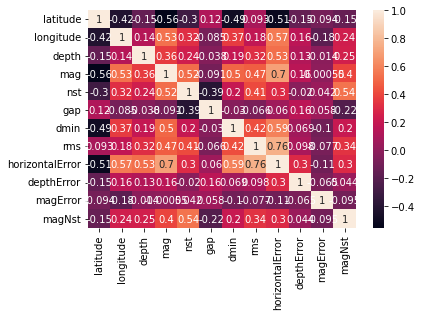

<Figure size 7200x7200 with 0 Axes>

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_matrix, annot=True)
plt.figure(figsize=(100,100))
plt.show()


Taking only the required part that is place lat long depth mag and place

In [ ]:
df = df[['time', 'latitude', 'longitude', 'depth', 'mag', 'place']]
df_1=df

In [ ]:
df

,time,latitude,longitude,depth,mag,place
0,2022-12-27T03:52:15.750Z,36.974998,-121.046166,7.590000,1.96,"20km WSW of Los Banos, CA"
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,south of Tonga
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,"6 km SE of Kasilof, Alaska"
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,"63 km WNW of Happy Valley, Alaska"
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,"110 km SW of Jinchang, China"
...,...,...,...,...,...,...
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,"91 km SSE of Kokhanok, Alaska"
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,Kermadec Islands region
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,"22 km ENE of Cortes, Philippines"
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,"18 km NW of Fishhook, Alaska"


In [ ]:
newdf = df['place'].str.split(', ', expand=True) #obly states
newdf

,0,1,2
0,20km WSW of Los Banos,CA,None
1,south of Tonga,None,None
2,6 km SE of Kasilof,Alaska,None
3,63 km WNW of Happy Valley,Alaska,None
4,110 km SW of Jinchang,China,None
...,...,...,...
10571,91 km SSE of Kokhanok,Alaska,None
10572,Kermadec Islands region,None,None
10573,22 km ENE of Cortes,Philippines,None
10574,18 km NW of Fishhook,Alaska,None


In [ ]:
df['place'] = newdf[1]
df2=df

<ipython-input-7-0c83933773ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['place'] = newdf[1]


In [ ]:
df


,time,latitude,longitude,depth,mag,place
0,2022-12-27T03:52:15.750Z,36.974998,-121.046166,7.590000,1.96,CA
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,None
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,Alaska
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,Alaska
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,China
...,...,...,...,...,...,...
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,Alaska
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,None
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,Philippines
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,Alaska


In [ ]:
df = df.sort_values('time', ascending=True)
df

,time,latitude,longitude,depth,mag,place
10575,2022-11-27T04:41:46.900Z,19.169001,-155.477173,31.469999,2.37,Hawaii
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,Alaska
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,Philippines
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,None
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,Alaska
...,...,...,...,...,...,...
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,China
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,Alaska
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,Alaska
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,None


In [ ]:
df['time'] = df['time'].str[0:10]
df3=df
df#splitting time to days/month/year

,time,latitude,longitude,depth,mag,place
10575,2022-11-27,19.169001,-155.477173,31.469999,2.37,Hawaii
10574,2022-11-27,61.836600,-149.519800,44.800000,1.30,Alaska
10573,2022-11-27,9.361600,126.378000,56.023000,5.00,Philippines
10572,2022-11-27,-31.098400,-178.797600,10.000000,5.00,None
10571,2022-11-27,58.654700,-154.285300,10.700000,1.60,Alaska
...,...,...,...,...,...,...
4,2022-12-27,37.948100,101.145900,10.000000,4.70,China
3,2022-12-27,60.097900,-152.827800,112.800000,2.30,Alaska
2,2022-12-27,60.304500,-151.181200,42.400000,2.00,Alaska
1,2022-12-27,-25.358900,-174.903900,10.000000,5.00,None


Taking out places as we will take in plces as final output as latitude longitude is at last places we take means of these places

In [ ]:
df_coords = df[['place', 'latitude', 'longitude']]
df_coords = df_coords.groupby(['place'], as_index=False).mean()
df_coords

,place,latitude,longitude
0,Afghanistan,36.346400,70.808343
1,Alaska,59.555644,-154.325357
2,Aleutian Islands,51.944346,-42.337504
3,Algeria,36.451200,3.116100
4,Antigua and Barbuda,17.650800,-60.952583
...,...,...,...
92,Vanuatu,-15.538331,167.827508
93,Wallis and Futuna,-16.513300,-176.979150
94,Washington,47.111054,-121.851426
95,Wyoming,44.715605,-110.728600


As you can see alaska is -154 in df_cord and -152 in df so we can grp it.

In [ ]:
#inner join the table as place being the point
df = df[['time', 'depth', 'mag', 'place']]#remove long and lat
df = pd.merge(left=df, right=df_coords, how='inner', on=['place'])
df5=df
df

,time,depth,mag,place,latitude,longitude
0,2022-11-27,31.469999,2.37,Hawaii,19.344094,-155.452834
1,2022-11-27,10.230000,1.96,Hawaii,19.344094,-155.452834
2,2022-11-27,32.610001,1.83,Hawaii,19.344094,-155.452834
3,2022-11-27,32.250000,2.14,Hawaii,19.344094,-155.452834
4,2022-11-27,28.840000,2.17,Hawaii,19.344094,-155.452834
...,...,...,...,...,...,...
9567,2022-12-22,8.587000,2.50,Ohio,41.109000,-83.444600
9568,2022-12-24,11.760000,2.52,Mississippi,34.673000,-88.514833
9569,2022-12-26,10.000000,5.50,Ethiopia,14.428300,39.910250
9570,2022-12-26,9.151000,4.60,Ethiopia,14.428300,39.910250


We are using rolling windows to take out mean of earthquake over a period of time so that we can predict it 

A common time-series model assumption is that the coefficients are constant with respect to time. Checking for instability amounts to examining whether the coefficients are time-invariant.

In [ ]:
# We will take a rolling window of size 7 as a week is a good number 7,14,21

eq_tmp = df.copy()


# loop through each zone and apply MA
eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()
    
    temp_df['Mdep_21'] = temp_df['depth'].rolling(window=21,center=False).mean() 
    temp_df['Mdep_14'] = temp_df['depth'].rolling(window=14,center=False).mean()
    temp_df['Mdep_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['Mmag_21'] = temp_df['mag'].rolling(window=21,center=False).mean() 
    temp_df['Mmag_14'] = temp_df['mag'].rolling(window=14,center=False).mean()
    temp_df['Mmag_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'Mmag_7'].shift(-9)##donot predict last 8 days as rolling window might be wrong for 28-30
    
    #days to predict value on earth quake data this is not yet seen or witnessed by next 7 days (consider as live next 7 days period)
    
    eq_data_last_days_out.append(temp_df.tail(9))#days we didnot count so we will predict these days

    eq_data.append(temp_df)

eq_data

[            time    depth   mag             place   latitude  longitude  \
 8800  2022-11-27   -1.780  0.05  Aleutian Islands  51.944346 -42.337504   
 8801  2022-11-27   -1.730  1.09  Aleutian Islands  51.944346 -42.337504   
 8802  2022-11-27   -1.620  1.13  Aleutian Islands  51.944346 -42.337504   
 8803  2022-11-27    4.180  0.45  Aleutian Islands  51.944346 -42.337504   
 8804  2022-11-27    4.990  1.06  Aleutian Islands  51.944346 -42.337504   
 ...          ...      ...   ...               ...        ...        ...   
 8949  2022-12-24   69.500  3.00  Aleutian Islands  51.944346 -42.337504   
 8950  2022-12-24  110.995  4.00  Aleutian Islands  51.944346 -42.337504   
 8951  2022-12-25   39.376  4.80  Aleutian Islands  51.944346 -42.337504   
 8952  2022-12-26    6.390  1.19  Aleutian Islands  51.944346 -42.337504   
 8953  2022-12-26    6.260  1.15  Aleutian Islands  51.944346 -42.337504   
 
         Mdep_21    Mdep_14     Mdep_7   Mmag_21   Mmag_14    Mmag_7  \
 8800        N

In [ ]:
#eq_data.head

In [ ]:

eq_all = pd.concat(eq_data)
eq_all#convert list to dataframe

,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
8800,2022-11-27,-1.780,0.05,Aleutian Islands,51.944346,-42.337504,NaN,NaN,NaN,NaN,NaN,NaN,1.507143
8801,2022-11-27,-1.730,1.09,Aleutian Islands,51.944346,-42.337504,NaN,NaN,NaN,NaN,NaN,NaN,1.885714
8802,2022-11-27,-1.620,1.13,Aleutian Islands,51.944346,-42.337504,NaN,NaN,NaN,NaN,NaN,NaN,1.782857
8803,2022-11-27,4.180,0.45,Aleutian Islands,51.944346,-42.337504,NaN,NaN,NaN,NaN,NaN,NaN,1.958571
8804,2022-11-27,4.990,1.06,Aleutian Islands,51.944346,-42.337504,NaN,NaN,NaN,NaN,NaN,NaN,1.342857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9351,2022-12-18,16.589,4.50,Greece,37.748975,24.280350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9352,2022-12-18,10.000,4.00,Greece,37.748975,24.280350,NaN,NaN,25.154571,NaN,NaN,4.385714,NaN
9353,2022-12-26,9.389,4.20,Greece,37.748975,24.280350,NaN,NaN,25.067286,NaN,NaN,4.328571,NaN
9556,2022-12-10,2.400,1.72,South Carolina,34.157167,-80.715667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#rolling windows has a lot of NAN from the 1st part removing it
# remove any NaN fields
eq_all=eq_all.dropna()
eq_all

,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
8820,2022-12-02,4.120,-0.60,Aleutian Islands,51.944346,-42.337504,17.460000,23.193571,32.705143,1.592857,1.807143,2.271429,2.408571
8821,2022-12-02,80.217,2.90,Aleutian Islands,51.944346,-42.337504,21.364619,28.409786,40.354429,1.728571,1.946429,2.314286,3.028571
8822,2022-12-02,39.900,2.20,Aleutian Islands,51.944346,-42.337504,23.347000,30.839786,32.148143,1.781429,2.052143,2.142857,3.185714
8823,2022-12-02,6.380,0.56,Aleutian Islands,51.944346,-42.337504,23.727952,30.555571,28.059571,1.754286,1.877857,1.822857,3.128571
8824,2022-12-03,82.000,1.90,Aleutian Islands,51.944346,-42.337504,27.433667,33.665214,38.345286,1.823333,1.792143,1.637143,2.901429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7836,2022-12-22,0.000,2.00,California,40.364027,-119.718784,7.116952,6.418286,6.236571,0.928571,0.871429,1.128571,0.685714
7837,2022-12-22,1.600,1.30,California,40.364027,-119.718784,6.936000,6.368286,3.585714,0.938095,0.971429,0.957143,0.800000
7838,2022-12-22,0.000,0.60,California,40.364027,-119.718784,6.731238,6.368286,3.585714,0.980952,0.964286,1.114286,0.814286
7839,2022-12-22,6.100,0.60,California,40.364027,-119.718784,6.650286,6.332571,3.285714,0.990476,1.007143,1.114286,0.871429


In [ ]:
eq_data_last_days_out = pd.concat(eq_data_last_days_out)



In [ ]:
eq_data_last_days_out


,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
8945,2022-12-22,35.000,3.30,Aleutian Islands,51.944346,-42.337504,8.273000,11.399500,9.928571,1.177619,1.348571,1.298571,NaN
8946,2022-12-23,70.000,3.30,Aleutian Islands,51.944346,-42.337504,11.304905,16.010214,19.652857,1.291905,1.520714,1.664286,NaN
8947,2022-12-23,3.500,0.10,Aleutian Islands,51.944346,-42.337504,11.294905,16.388786,19.122857,1.289048,1.464286,1.590000,NaN
8948,2022-12-24,-1.120,0.92,Aleutian Islands,51.944346,-42.337504,11.327286,15.647357,18.057143,1.297143,1.455000,1.580000,NaN
8949,2022-12-24,69.500,3.00,Aleutian Islands,51.944346,-42.337504,14.701571,20.201643,26.868571,1.414286,1.625000,1.945714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9351,2022-12-18,16.589,4.50,Greece,37.748975,24.280350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9352,2022-12-18,10.000,4.00,Greece,37.748975,24.280350,NaN,NaN,25.154571,NaN,NaN,4.385714,NaN
9353,2022-12-26,9.389,4.20,Greece,37.748975,24.280350,NaN,NaN,25.067286,NaN,NaN,4.328571,NaN
9556,2022-12-10,2.400,1.72,South Carolina,34.157167,-80.715667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
eq_data_last_days_out = eq_data_last_days_out[np.isfinite(eq_data_last_days_out['Mmag_21'])]
eq_data_last_days_out

,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
8945,2022-12-22,35.00,3.30,Aleutian Islands,51.944346,-42.337504,8.273000,11.399500,9.928571,1.177619,1.348571,1.298571,NaN
8946,2022-12-23,70.00,3.30,Aleutian Islands,51.944346,-42.337504,11.304905,16.010214,19.652857,1.291905,1.520714,1.664286,NaN
8947,2022-12-23,3.50,0.10,Aleutian Islands,51.944346,-42.337504,11.294905,16.388786,19.122857,1.289048,1.464286,1.590000,NaN
8948,2022-12-24,-1.12,0.92,Aleutian Islands,51.944346,-42.337504,11.327286,15.647357,18.057143,1.297143,1.455000,1.580000,NaN
8949,2022-12-24,69.50,3.00,Aleutian Islands,51.944346,-42.337504,14.701571,20.201643,26.868571,1.414286,1.625000,1.945714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,2022-12-23,10.00,-0.10,California,40.364027,-119.718784,5.802667,4.128571,4.671429,0.871429,0.900000,0.685714,NaN
7846,2022-12-23,6.50,1.40,California,40.364027,-119.718784,5.797905,4.007143,4.728571,0.938095,0.957143,0.800000,NaN
7847,2022-12-23,13.40,1.50,California,40.364027,-119.718784,6.288381,4.328571,6.642857,0.933333,1.021429,0.814286,NaN
7848,2022-12-23,1.50,1.40,California,40.364027,-119.718784,5.721714,3.978571,5.885714,0.923810,1.042857,0.871429,NaN


In [ ]:
eq_all['mag_outcome'].value_counts()

1.214286    26
1.428571    26
1.571429    24
1.357143    24
1.414286    24
            ..
2.185714     1
2.144286     1
2.134286     1
2.190000     1
0.942857     1
Name: mag_outcome, Length: 3502, dtype: int64

In [ ]:
#considered magnitude above 2.5 as dangerous hence prediction outcome as '1' elso '0'.
eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)
eq_all['mag_outcome'].value_counts()

<ipython-input-21-83cfda7d5cbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)


0    8108
1     329
Name: mag_outcome, dtype: int64

In [ ]:
#therefore although data is 95% 0 and 5% 1

In [ ]:
df_features=eq_all

In [ ]:
# splitting traing and testing dataset with trainging size = 70% and test = 30%
req=['depth','Mdep_21','Mdep_14','Mdep_7','Mmag_21','Mmag_14','Mmag_7']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features[req], df_features['mag_outcome'], test_size=0.3, random_state=42)

In [ ]:
X_train

,depth,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7
6954,15.62,8.151905,9.211429,12.994286,1.293333,1.435000,1.512857
2708,61.20,25.800000,21.721429,28.714286,1.614286,1.478571,1.714286
6259,16.15,6.519524,7.476429,6.552857,1.075714,1.143571,1.020000
2734,1.07,27.082857,23.445714,25.998571,1.341905,1.034286,0.865714
3814,73.10,39.057619,40.724286,65.472857,1.269048,1.202857,1.732857
...,...,...,...,...,...,...,...
4994,1.88,3.540000,3.827143,3.661429,1.102381,1.165000,1.222857
8100,9.30,7.776190,7.650000,5.800000,0.480952,0.578571,0.614286
4650,2.40,7.109048,6.630714,4.485714,0.907143,0.741429,0.844286
1735,68.90,55.066048,48.041929,45.998143,1.714286,1.757143,2.100000


In [ ]:
X_test

,depth,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7
2085,92.90,51.539524,42.237857,43.171429,1.374762,1.362143,1.457143
6500,8.71,5.750952,5.518571,7.534286,0.943810,0.978571,0.915714
4742,4.74,4.340476,4.230000,2.840000,1.095714,1.066429,1.298571
5645,12.30,5.671905,4.031429,6.098571,0.924762,1.002143,0.958571
2366,97.70,59.060476,53.283571,63.195714,1.536667,1.640714,1.710000
...,...,...,...,...,...,...,...
6869,22.69,13.039524,13.601429,15.630000,1.913810,1.912143,2.017143
2045,101.30,42.567143,56.244286,53.900000,0.824762,1.115714,1.214286
1454,45.00,38.438571,41.121429,46.228571,1.373810,1.278571,1.314286
3057,33.50,29.028571,35.100000,39.285714,1.561905,1.592857,1.628571


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5905, 7) (2532, 7) (5905,) (2532,)


In [ ]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.regularizers import L1L2
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,BatchNormalization,Dropout



model_mlp = Sequential()
model_mlp.add(Dense(80, activation='relu', kernel_regularizer=L1L2(l1=1e-4, l2=1e-2), input_dim=X_train.shape[1]))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(20, activation='relu', kernel_regularizer=L1L2(l1=1e-2, l2=1e-1)))
model_mlp.add(Dense(1, activation='sigmoid'))
model_mlp.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mse'])
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                640       
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1620      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:

mlp_history = model_mlp.fit(X_train.values, y_train, validation_data=(X_test.values, y_test), epochs=20, verbose=1)
#10 epochs is good
#15 is questionable

Epoch 1/20
185/185 [==============================] - 4s 6ms/step - loss: 3.8715 - mse: 0.1185 - val_loss: 1.9571 - val_mse: 0.0650
Epoch 2/20
185/185 [==============================] - 1s 4ms/step - loss: 1.3782 - mse: 0.0583 - val_loss: 0.9484 - val_mse: 0.0486
Epoch 3/20
185/185 [==============================] - 1s 4ms/step - loss: 0.7692 - mse: 0.0500 - val_loss: 0.6059 - val_mse: 0.0437
Epoch 4/20
185/185 [==============================] - 1s 4ms/step - loss: 0.5048 - mse: 0.0433 - val_loss: 0.4158 - val_mse: 0.0416
Epoch 5/20
185/185 [==============================] - 1s 4ms/step - loss: 0.3635 - mse: 0.0389 - val_loss: 0.3196 - val_mse: 0.0399
Epoch 6/20
185/185 [==============================] - 1s 4ms/step - loss: 0.2847 - mse: 0.0371 - val_loss: 0.2658 - val_mse: 0.0392
Epoch 7/20
185/185 [==============================] - 1s 4ms/step - loss: 0.2387 - mse: 0.0356 - val_loss: 0.2334 - val_mse: 0.0378
Epoch 8/20
185/185 [==============================] - 1s 5ms/step - loss: 0.

In [ ]:
model_mlp.evaluate(X_test, y_test)

80/80 [==============================] - 0s 2ms/step - loss: 0.1814 - mse: 0.0388


[0.18135486543178558, 0.03879266977310181]

In [ ]:
y_test.shape

(2532,)

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model_mlp.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(y_test.values.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(y_test.values.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)


Variance: 0.023769
R2 Score: 0.023769


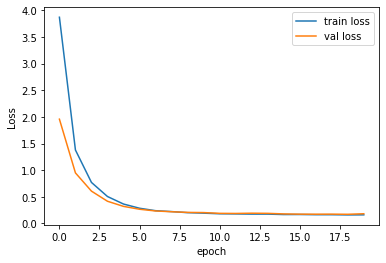

In [ ]:
plt.plot(mlp_history.history['loss'], label='train loss')
plt.plot(mlp_history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
from sklearn import metrics
predicted = model_mlp.predict(X_test)
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

80/80 [==============================] - 0s 1ms/step
Root Mean Squared Error: 0.19695854447855307
R-squared : 0.015093432666102413


0.6639724052718287
AUC: 0.664


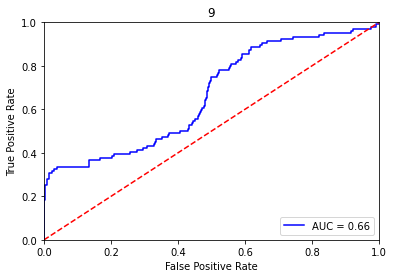

In [ ]:
#taken from net
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

pred= predicted

print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('9')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
predicted.shape
predicted

array([[0.02569284],
       [0.01829551],
       [0.01820443],
       ...,
       [0.02677413],
       [0.02481803],
       [0.0198423 ]], dtype=float32)

In [ ]:

a= np.reshape(predicted,2532,)
a.shape


(2532,)

In [ ]:
y_test.shape

(2532,)

In [ ]:
a

array([0.02569284, 0.01829551, 0.01820443, ..., 0.02677413, 0.02481803,
       0.0198423 ], dtype=float32)

In [ ]:
for i in range(len(a)):
  if a[i]>0.5:
    a[i]=1
  else:
    a[i]=0

a 

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,a ))

[[2428    0]
 [ 104    0]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, a).ravel()
print(classification_report(y_test, a))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2428
           1       0.00      0.00      0.00       104

    accuracy                           0.96      2532
   macro avg       0.48      0.50      0.49      2532
weighted avg       0.92      0.96      0.94      2532



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,a)

0.9589257503949447

### **CNN TRY DISCARDED **

In [ ]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
model_cnn.summary()


# **With dropout**

In [ ]:
model = Sequential()
model.add(Dense(750, kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu",input_shape=(7,)))
model.add(BatchNormalization())
model.add(Dense(512, kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(200,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(60,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(16,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dense(1,activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])

In [ ]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=5)
history1 =model.fit(X_train, y_train, validation_split=0.35, shuffle=True, epochs=100,batch_size=2000,callbacks=[callback])

In [ ]:
#taken from net
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

pred= model.predict(X_test)

print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
pred.shape

In [ ]:

a= np.reshape(pred,2532,)
a.shape


In [ ]:
y_test.shape

In [ ]:
a

In [ ]:
for i in range(len(a)):
  if a[i]>0.5:
    a[i]=1
  else:
    a[i]=0

a 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,a ))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, a).ravel()
print(classification_report(y_test, a))

predicting

In [ ]:
df_predict=eq_data_last_days_out
df_predict.shape
preds=model_mlp.predict(df_predict[req])

In [ ]:
live_set = df_predict[['time', 'place', 'latitude', 'longitude']]
live_set.loc[:,'quake'] = preds
live_set

In [ ]:
#grouping it
live_set = live_set.groupby(['time', 'place'], as_index=False).mean()
live_set


In [ ]:
# increment date to include DAYS_OUT_TO_PREDICT
live_set['time']= pd.to_datetime(live_set['time'],format='%Y-%m-%d') 
live_set['time'] = live_set['time'] + pd.to_timedelta(9,unit='d')

live_set

In [ ]:
import datetime as dt
# giving out predictions from today
days = list(set([d for d in live_set['time'].astype(str) if d > dt.datetime.today().strftime('%Y-%m-%d')]))
days.sort()

# Predict NaN outcome value in earthquake for next day 1.
predict_day=days[1]
predict_day
z=pd.DataFrame (days, columns = ['time'])
z
z['time']= pd.to_datetime(z['time'],format='%Y-%m-%d') 

In [ ]:
answer=pd.merge(left=live_set, right=z, how='inner', on=['time'])
answer

In [ ]:
#internet
for i in range(0,8):
    live_set_tmp = live_set[live_set['time'] == days[i]]
    plt.scatter(live_set_tmp['longitude'], live_set_tmp['latitude'], s=(live_set_tmp['quake'] * 100))
    plt.suptitle('Future Earthquakes for ' + days[i])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
from folium import Choropleth
from folium.plugins import HeatMap


#internet
#Reference for plot https://python-visualization.github.io/folium/quickstart.html & https://www.kaggle.com/code/cwthompson/volcano-making-a-map-of-volcanoes-using-folium/notebook

for i in range(0,8):
    live_set_tmp = live_set[live_set['time'] == days[i]]
    volcano_map = folium.Map()
    for i in range(0, live_set_tmp.shape[0]):
      volcano = live_set_tmp.iloc[i]
      folium.Marker([volcano['latitude'], volcano['longitude']], popup=volcano['place']).add_to(volcano_map)
    print(live_set_tmp['time'])
    display(volcano_map)






33   2022-12-29
34   2022-12-29
35   2022-12-29
36   2022-12-29
37   2022-12-29
38   2022-12-29
39   2022-12-29
40   2022-12-29
Name: time, dtype: datetime64[ns]


41   2022-12-30
42   2022-12-30
43   2022-12-30
44   2022-12-30
45   2022-12-30
46   2022-12-30
47   2022-12-30
48   2022-12-30
Name: time, dtype: datetime64[ns]


49   2022-12-31
50   2022-12-31
51   2022-12-31
52   2022-12-31
53   2022-12-31
54   2022-12-31
55   2022-12-31
56   2022-12-31
57   2022-12-31
Name: time, dtype: datetime64[ns]


58   2023-01-01
59   2023-01-01
60   2023-01-01
61   2023-01-01
62   2023-01-01
63   2023-01-01
64   2023-01-01
65   2023-01-01
66   2023-01-01
67   2023-01-01
68   2023-01-01
Name: time, dtype: datetime64[ns]


69   2023-01-02
70   2023-01-02
71   2023-01-02
72   2023-01-02
73   2023-01-02
74   2023-01-02
75   2023-01-02
76   2023-01-02
77   2023-01-02
78   2023-01-02
79   2023-01-02
Name: time, dtype: datetime64[ns]


80   2023-01-03
81   2023-01-03
82   2023-01-03
83   2023-01-03
84   2023-01-03
85   2023-01-03
86   2023-01-03
Name: time, dtype: datetime64[ns]


87    2023-01-04
88    2023-01-04
89    2023-01-04
90    2023-01-04
91    2023-01-04
92    2023-01-04
93    2023-01-04
94    2023-01-04
95    2023-01-04
96    2023-01-04
97    2023-01-04
98    2023-01-04
99    2023-01-04
100   2023-01-04
101   2023-01-04
Name: time, dtype: datetime64[ns]


102   2023-01-05
103   2023-01-05
104   2023-01-05
105   2023-01-05
106   2023-01-05
107   2023-01-05
108   2023-01-05
109   2023-01-05
Name: time, dtype: datetime64[ns]


In [ ]:
model1=model_mlp
model1.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x7f32a7e89b20>>

In [ ]:
model2=model
model2.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x7f3240508f70>>

#Overfitting

In [ ]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.regularizers import L1L2
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,BatchNormalization,Dropout



overfitt_mlp = Sequential()
overfitt_mlp.add(Dense(80, activation='relu', input_dim=X_train.shape[1]))
overfitt_mlp.add(Dense(20, activation='relu'))
overfitt_mlp.add(Dense(1, activation='sigmoid'))
overfitt_mlp.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
overfitt_mlp.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 80)                640       
                                                                 
 dense_29 (Dense)            (None, 20)                1620      
                                                                 
 dense_30 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:

overfitt_mlp_hist = overfitt_mlp.fit(X_train.values, y_train, validation_data=(X_test.values, y_test), epochs=10, verbose=1)
#10 epochs is good
#15 is questionable

Epoch 1/10
185/185 [==============================] - 2s 7ms/step - loss: 0.3211 - auc: 0.2667 - val_loss: 0.3659 - val_auc: 0.2741
Epoch 2/10
185/185 [==============================] - 1s 5ms/step - loss: 0.2353 - auc: 0.2485 - val_loss: 0.2406 - val_auc: 0.2571
Epoch 3/10
185/185 [==============================] - 1s 5ms/step - loss: 0.2025 - auc: 0.4076 - val_loss: 0.2088 - val_auc: 0.4839
Epoch 4/10
185/185 [==============================] - 1s 6ms/step - loss: 0.1683 - auc: 0.6429 - val_loss: 0.1447 - val_auc: 0.8613
Epoch 5/10
185/185 [==============================] - 1s 5ms/step - loss: 0.1254 - auc: 0.8194 - val_loss: 0.1480 - val_auc: 0.8361
Epoch 6/10
185/185 [==============================] - 1s 5ms/step - loss: 0.1317 - auc: 0.8231 - val_loss: 0.1022 - val_auc: 0.9447
Epoch 7/10
185/185 [==============================] - 1s 5ms/step - loss: 0.0983 - auc: 0.9066 - val_loss: 0.0979 - val_auc: 0.9397
Epoch 8/10
185/185 [==============================] - 1s 5ms/step - loss: 0.

In [ ]:
overfitt_mlp.evaluate(X_test, y_test)

80/80 [==============================] - 0s 3ms/step - loss: 0.0902 - auc: 0.9383


[0.09022411704063416, 0.9382773041725159]

In [ ]:
y_test.shape

(2532,)

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs1 = overfitt_mlp.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs1 = yhat_probs1[:, 0]

var = explained_variance_score(y_test.values.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(y_test.values.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)


Variance: 0.092105
R2 Score: 0.092105


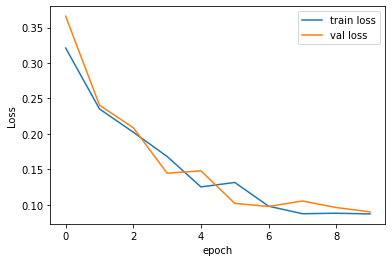

In [ ]:
plt.plot(overfitt_mlp_hist.history['loss'], label='train loss')
plt.plot(overfitt_mlp_hist.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()